In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2 as cv
import numpy as np
import math

from matplotlib import pyplot as plt
from skimage.measure import approximate_polygon

In [3]:
img = cv.imread('test_picture_3.JPG')
img_gray = cv.imread('test_picture_3.JPG',0)

ret, thresh = cv.threshold(img_gray, 230, 200, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

# cv.drawContours(img, contours, -1, (0, 255, 0), 3)
# cv.imshow('Image', img)
# cv.waitKey(0)
# cv.destroyAllWindows()

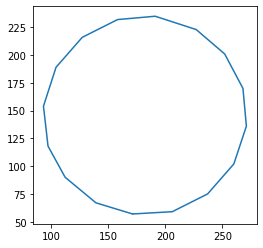

In [4]:
circle_contour = np.squeeze(contours[8])
approx_circle_contour = approximate_polygon(circle_contour, tolerance=2.5)

fig, (ax1) = plt.subplots(figsize=(4, 4))
ax1.plot(approx_circle_contour[:, 0], approx_circle_contour[:, 1])
plt.show()

In [5]:
approx_circle_contour

array([[172,  57],
       [206,  59],
       [237,  75],
       [260, 102],
       [271, 136],
       [268, 170],
       [252, 201],
       [227, 223],
       [191, 235],
       [158, 232],
       [127, 216],
       [104, 189],
       [ 93, 154],
       [ 97, 118],
       [112,  90],
       [139,  67],
       [171,  57]], dtype=int32)

In [6]:
line = np.stack((approx_circle_contour[5], approx_circle_contour[6]), axis=0)
print(line)

[[268 170]
 [252 201]]


In [7]:
x1 = line[0,0]
y1 = line[0,1]
x2 = line[1,0]
y2 = line[1,1]

deltaX = x2 - x1
deltaY = y2 - y1

angle = abs(math.degrees(math.atan2(deltaX, deltaY)))
print(angle)

27.299572211332805


In [8]:
default_anlges = np.arange(0, 181.0, 22.5)
print(default_anlges)

[  0.   22.5  45.   67.5  90.  112.5 135.  157.5 180. ]


In [9]:
def find_nearest(array, value):
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [10]:
find_nearest(default_anlges, angle)

22.5